In [7]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from sklearn.datasets import fetch_openml
dataset=fetch_openml("mnist_784")

In [3]:
type(dataset),type(dataset["data"]),type(dataset["target"])

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray)

In [4]:
X, y = dataset["data"], dataset["target"]

In [5]:
X = X / 255  #broadcasting normalize

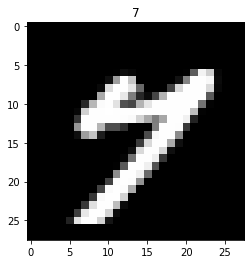

In [8]:
i=1001
img_1=X[i,:].reshape(28,28)
plt.imshow(img_1,cmap="gray")
plt.title(y[i])
plt.show()

In [9]:
digits = 10                  #one-hot işlemi
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [10]:
Y_new.shape

(10, 70000)

In [14]:
Y_new[:,100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
y[0,100]

'5'

In [16]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

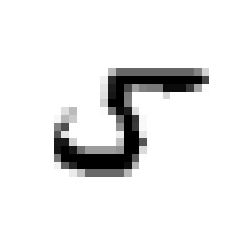

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [19]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap =matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [20]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [22]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [24]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [25]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  9.664998327209853
Epoch 100 cost:  0.7577798356274893
Epoch 200 cost:  0.5749629635513182
Epoch 300 cost:  0.49527792668317877
Epoch 400 cost:  0.4467692209761096
Epoch 500 cost:  0.41259924908519346
Epoch 600 cost:  0.38666449842327616
Epoch 700 cost:  0.3659440112546571
Epoch 800 cost:  0.34874752794365615
Epoch 900 cost:  0.3340910880060096
Epoch 1000 cost:  0.32134995158689056
Epoch 1100 cost:  0.31009211466146896
Epoch 1200 cost:  0.300016075078467
Epoch 1300 cost:  0.2909054504039916
Epoch 1400 cost:  0.2825993495740125
Epoch 1500 cost:  0.2749756076184992
Epoch 1600 cost:  0.2679407328650555
Epoch 1700 cost:  0.2614212783167044
Epoch 1800 cost:  0.2553563069653923
Epoch 1900 cost:  0.24969280356946302
Final cost: 0.24443555248292437


In [26]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 948    0   11    3    1    5   16    4   10   14]
 [   0 1112    1    0    4    2    1    5    2    6]
 [   2    5  940   24    8    6    6   30   14    1]
 [   1    5   17  923    2   32    3    4   19    9]
 [   0    0    8    0  906    3   17    6   15   40]
 [  10    2    0   22    1  794   17    2   30   14]
 [   9    5    7    1    8   11  891    0   10    1]
 [   3    1   14   10    3    9    2  938   14   20]
 [   4    5   31   22   11   23    5    7  847   11]
 [   3    0    3    5   38    7    0   32   13  893]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1012
           1       0.98      0.98      0.98      1133
           2       0.91      0.91      0.91      1036
           3       0.91      0.91      0.91      1015
           4       0.92      0.91      0.92       995
           5       0.89      0.89      0.89       892
           6       0.93      0.94      0.94       943
           7       0.91      0.93   